<a href="https://colab.research.google.com/github/RasikhTariq/hello-world/blob/main/Congo_red_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Replace 'your_path' with the path of your Excel file within your Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/Congo red/Database_Congo.xlsx'

# Load the Excel file
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe
df


,Initial concentration,Time,Temperature,pH,Dosis,Removal percentage
0,25.00,15,300.15,7.0,1,8.465233
1,25.00,60,300.15,7.0,1,32.069454
2,25.00,180,300.15,7.0,1,43.491614
3,25.00,360,300.15,7.0,1,49.854319
4,25.00,720,300.15,7.0,1,52.980550
...,...,...,...,...,...,...
100,87.52,1440,300.15,7.0,10,41.744744
101,219.90,1440,300.15,7.0,10,25.376535
102,453.85,1440,300.15,7.0,10,19.726782
103,717.08,1440,300.15,7.0,10,13.365315


In [ ]:
import pandas as pd
import plotly.express as px

# Load the data from the Excel file
# Make sure to use the correct path to your file
data = df

# Extract input variables and target variable based on the provided column names
X = data[['Initial concentration', 'Time', 'Temperature', 'pH', 'Dosis']]
y = data['Removal percentage']

# Combine X and y into a single DataFrame for plotting
data_to_plot = pd.concat([X, y], axis=1)

# Create a parallel coordinates plot
fig = px.parallel_coordinates(data_to_plot, color='Removal percentage',
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              labels={
                                  'Initial concentration': '  Initial Concentration',
                                  'Time': 'Time',
                                  'Temperature': 'Temperature',
                                  'pH': 'pH',
                                  'Dosis': 'Dosis',
                                  'Removal percentage': 'Removal Percentage'
                              })

# Customize the plot
fig.update_layout(
    xaxis_title="Variables",
    yaxis_title="Values",
    width=2000,  # Custom width
    height=750,  # Custom height
    font=dict(size=20),  # Set the text font size
    title_font=dict(size=30)  # Set the title font size
)

# Show the plot
fig.show()


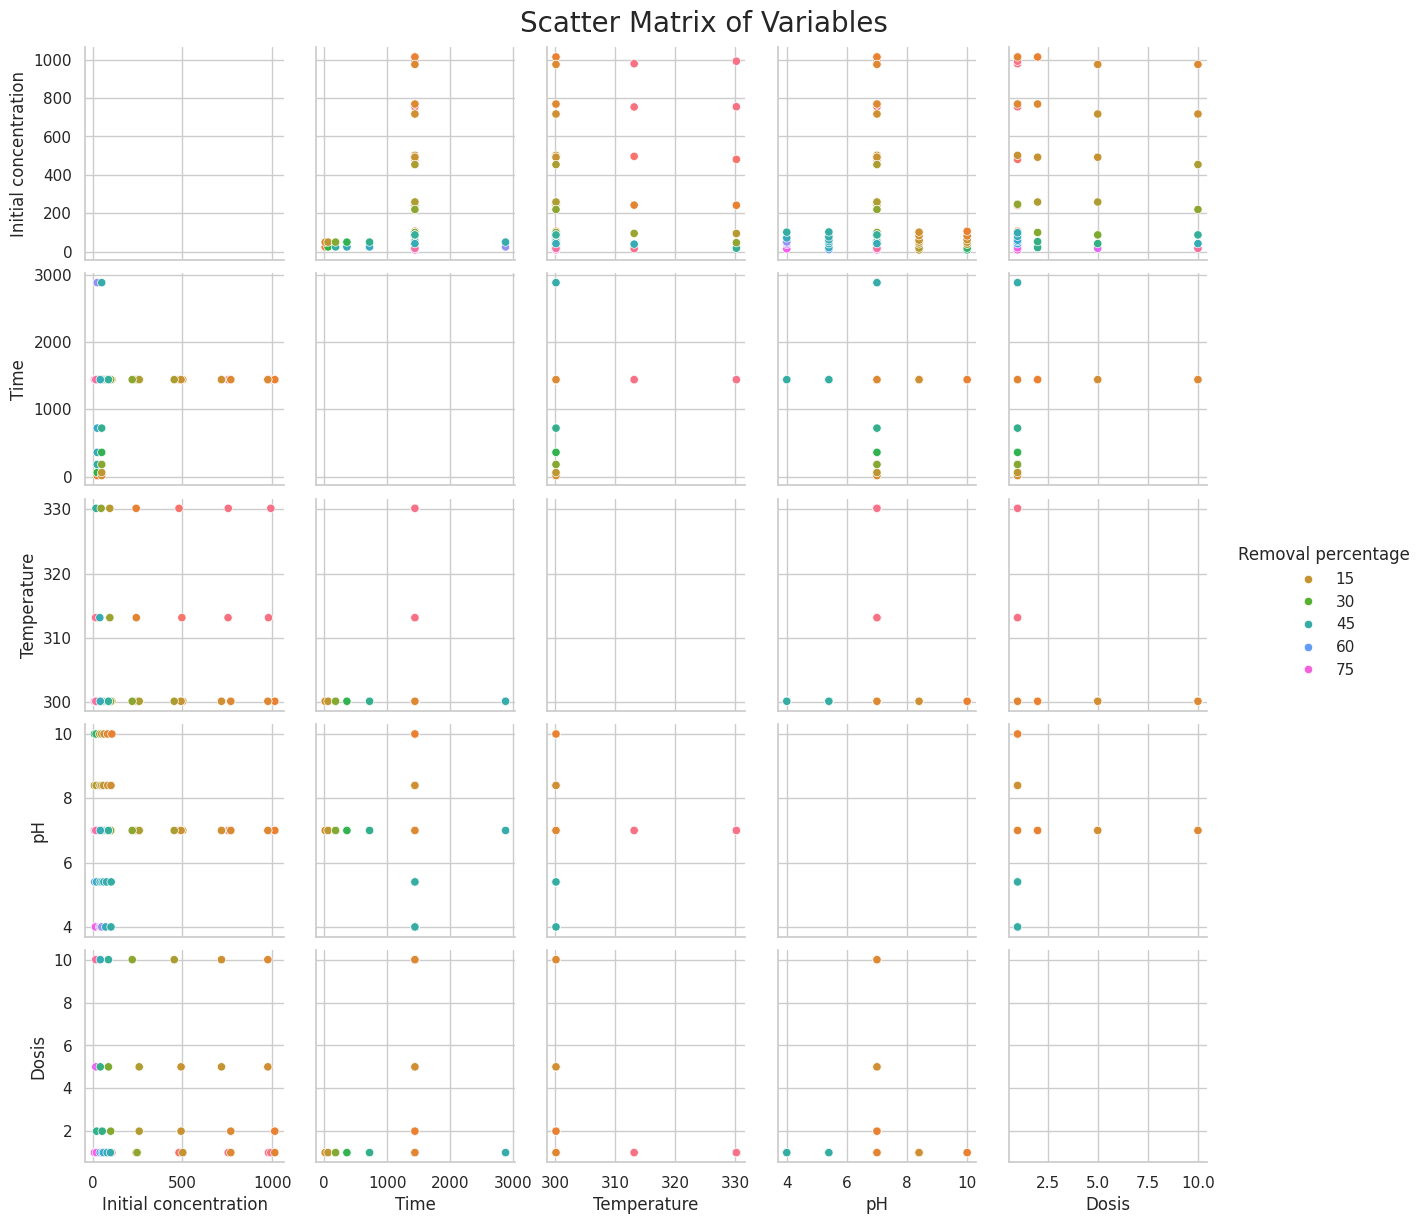

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'path_to_file' with the actual path to your Excel file

# Use seaborn's pairplot function to create the scatter matrix
# Set the 'hue' parameter to 'Removal percentage' for color coding
# Adjust the 'palette' parameter as per your color preference
sns.set(style='whitegrid', palette='muted')

# Create a pair plot with an attractive color palette
pair_plot = sns.pairplot(data, hue='Removal percentage', palette='husl')

# Enhance the plot further with matplotlib settings
pair_plot.fig.suptitle('Scatter Matrix of Variables', size=20)
pair_plot.fig.subplots_adjust(top=0.95)  # Adjust title spacing

# Show the plot
plt.show()


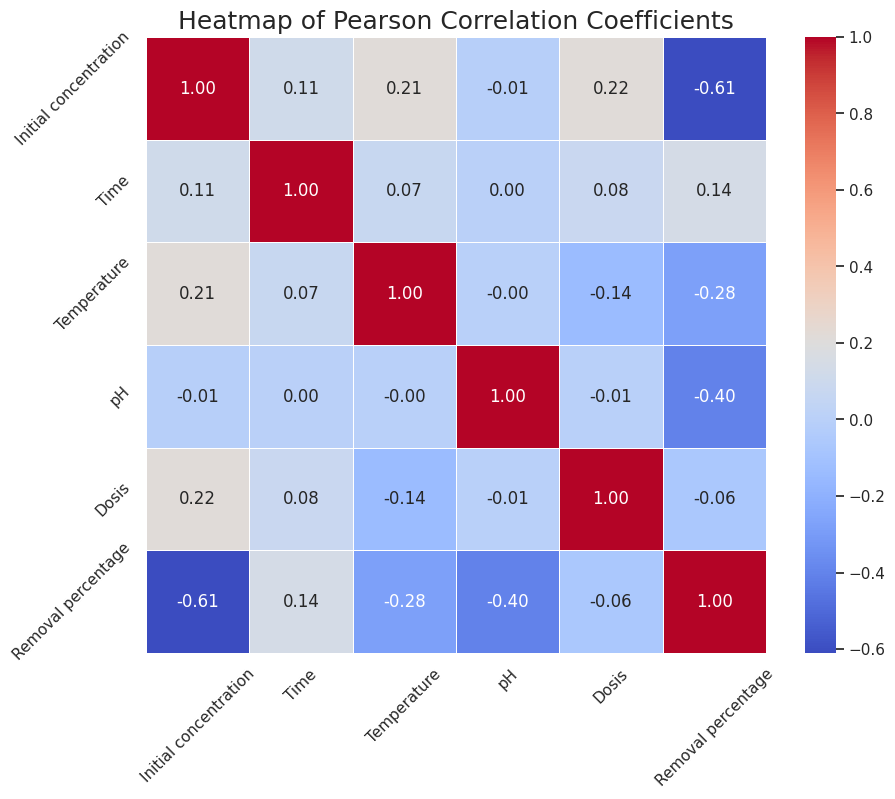

,Initial concentration,Time,Temperature,pH,Dosis,Removal percentage
Initial concentration,1.000000,0.114991,0.214944,-0.007275,0.218454,-0.610256
Time,0.114991,1.000000,0.073872,0.002621,0.080257,0.138451
Temperature,0.214944,0.073872,1.000000,-0.004624,-0.141606,-0.282983
pH,-0.007275,0.002621,-0.004624,1.000000,-0.005024,-0.403587
Dosis,0.218454,0.080257,-0.141606,-0.005024,1.000000,-0.064662
Removal percentage,-0.610256,0.138451,-0.282983,-0.403587,-0.064662,1.000000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the Pearson correlation coefficients between your variables
correlation_matrix = data.corr(method='pearson')

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)

# Customize the plot
plt.title('Heatmap of Pearson Correlation Coefficients', size=18)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()
correlation_matrix

In [ ]:
import pandas as pd


# Compute descriptive statistics
descriptive_stats = data.describe()

# Display the descriptive statistics
descriptive_stats


,Initial concentration,Time,Temperature,pH,Dosis,Removal percentage
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,201.551486,1355.714286,303.016667,7.015238,1.933333,35.708732
std,293.316186,413.894745,7.978416,1.195406,2.390955,22.469218
min,9.260000,15.000000,300.150000,4.000000,1.000000,2.847782
25%,38.872000,1440.000000,300.150000,7.000000,1.000000,14.665072
50%,59.724000,1440.000000,300.150000,7.000000,1.000000,37.276505
75%,241.900000,1440.000000,300.150000,7.000000,1.000000,50.938086
max,1014.000000,2880.000000,330.150000,10.000000,10.000000,85.251397


                      MSE      RMSE        MAE           SSE       MAPE  \
Training data  345.108282  18.57709  15.731606  28989.095677   86.41084   
Testing data   218.867475  14.79417  13.342511   4596.216975  124.17716   

                      MPE       COD  
Training data  -60.880769  0.340708  
Testing data  -106.675672  0.429416  


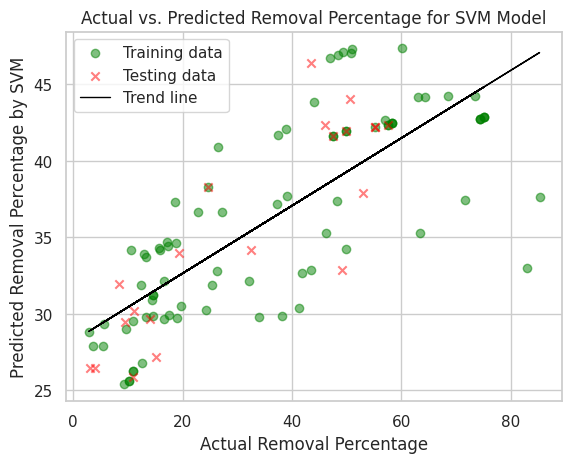

Equation of the trend line: y = 0.2212x + 28.2259


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and is already imported

# Prepare the feature variables (X) and the target variable (y)
X = df[['Initial concentration', 'Time', 'Temperature', 'pH', 'Dosis']]
y = df['Removal percentage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating the SVR model
modelSVM = SVR(kernel='rbf', C=1.0, epsilon=0.1)
modelSVM.fit(X_train_scaled, y_train)

# Predicting on training and test data
y_train_pred_SVM = modelSVM.predict(X_train_scaled)
y_test_pred_SVM = modelSVM.predict(X_test_scaled)

# Functions to calculate additional metrics
def calculate_sse(y_true, y_pred):
    return np.sum((y_true - y_pred)**2)

def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_mpe(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100

def calculate_cod(y_true, y_pred):
    sse = calculate_sse(y_true, y_pred)
    sst = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (sse / sst)

# Calculate additional metrics for the training set
sse_train_SVM = calculate_sse(y_train, y_train_pred_SVM)
mape_train_SVM = calculate_mape(y_train, y_train_pred_SVM)
mpe_train_SVM = calculate_mpe(y_train, y_train_pred_SVM)
cod_train_SVM = calculate_cod(y_train, y_train_pred_SVM)

# Calculate additional metrics for the test set
sse_test_SVM = calculate_sse(y_test, y_test_pred_SVM)
mape_test_SVM = calculate_mape(y_test, y_test_pred_SVM)
mpe_test_SVM = calculate_mpe(y_test, y_test_pred_SVM)
cod_test_SVM = calculate_cod(y_test, y_test_pred_SVM)

# Create DataFrames to hold the performance metrics for training and testing data
indicators_df_train_SVM = pd.DataFrame({
    'MSE': [mean_squared_error(y_train, y_train_pred_SVM)],
    'RMSE': [np.sqrt(mean_squared_error(y_train, y_train_pred_SVM))],
    'MAE': [mean_absolute_error(y_train, y_train_pred_SVM)],
    'SSE': [sse_train_SVM],
    'MAPE': [mape_train_SVM],
    'MPE': [mpe_train_SVM],
    'COD': [cod_train_SVM],
}, index=['Training data'])

indicators_df_test_SVM = pd.DataFrame({
    'MSE': [mean_squared_error(y_test, y_test_pred_SVM)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred_SVM))],
    'MAE': [mean_absolute_error(y_test, y_test_pred_SVM)],
    'SSE': [sse_test_SVM],
    'MAPE': [mape_test_SVM],
    'MPE': [mpe_test_SVM],
    'COD': [cod_test_SVM],
}, index=['Testing data'])

SVMIndicators = pd.concat([indicators_df_train_SVM, indicators_df_test_SVM])
print(SVMIndicators)

# Visualization
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Combine training and testing data for plotting
combined_y_actual = np.concatenate((y_train, y_test))
combined_y_pred_SVM = np.concatenate((y_train_pred_SVM, y_test_pred_SVM))

# Scatter plot for actual vs predicted values
plt.scatter(y_train, y_train_pred_SVM, color='green', label='Training data', alpha=0.5)
plt.scatter(y_test, y_test_pred_SVM, color='red', marker='x', label='Testing data', alpha=0.5)

# Fitting a trend line
combined_y_actual_reshaped = combined_y_actual.reshape(-1, 1)
linear_reg_model = LinearRegression().fit(combined_y_actual_reshaped, combined_y_pred_SVM)
y_trend_line = linear_reg_model.predict(combined_y_actual_reshaped)

# Plot the trend line
plt.plot(combined_y_actual, y_trend_line, color='black', linestyle='-', linewidth=1, label='Trend line')

# Plot customization
plt.xlabel('Actual Removal Percentage')
plt.ylabel('Predicted Removal Percentage by SVM')
plt.title('Actual vs. Predicted Removal Percentage for SVM Model')
plt.legend()
plt.grid(True)
plt.show()

# Trend line equation
slope = linear_reg_model.coef_[0]
intercept = linear_reg_model.intercept_
print(f"Equation of the trend line: y = {slope:.4f}x + {intercept:.4f}")


1/1 [==============================] - 0s 24ms/step
Training Mean Squared Error: 336.7843487063382
Test Mean Squared Error: 256.68525636352933


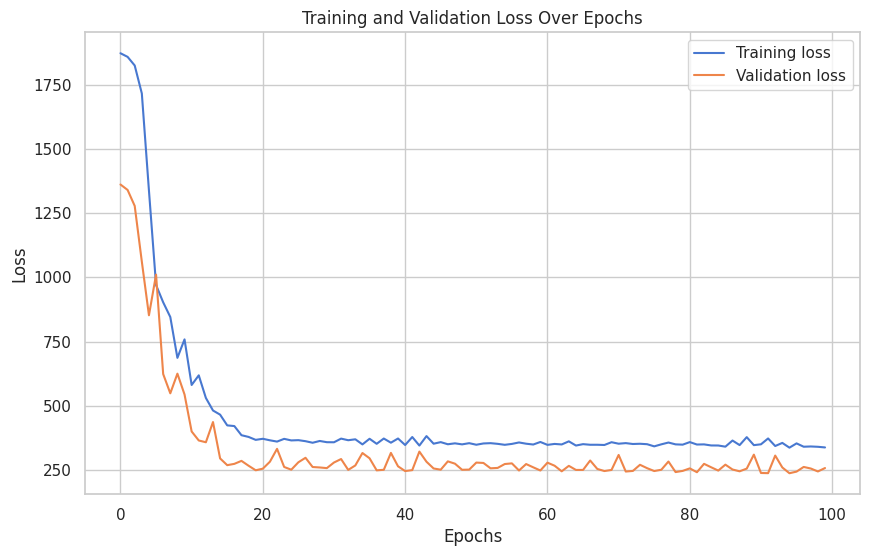

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Assuming 'df' is your DataFrame that contains the dataset

# Prepare the feature variables (X) and the target variable (y)
X = df[['Initial concentration', 'Time', 'Temperature', 'pH', 'Dosis']].values
y = df['Removal percentage'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LSTM expects input to be in [samples, time steps, features] format
# Since we are not using time series data, we can consider each variable as one time step.
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)

# Predicting on training and test data
y_train_pred_LSTM = model.predict(X_train_scaled)
y_test_pred_LSTM = model.predict(X_test_scaled)

# Reshape y_pred to be a flat array, if necessary
y_train_pred_LSTM = y_train_pred_LSTM.ravel()
y_test_pred_LSTM = y_test_pred_LSTM.ravel()

# Calculate performance metrics
mse_train_LSTM = mean_squared_error(y_train, y_train_pred_LSTM)
mse_test_LSTM = mean_squared_error(y_test, y_test_pred_LSTM)

# Print out the mean squared error
print(f'Training Mean Squared Error: {mse_train_LSTM}')
print(f'Test Mean Squared Error: {mse_test_LSTM}')

# Visualization of training and testing loss over epochs
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


                     MSE         SSE       MAPE      RMSE       MAE  \
Training data   4.052313  340.394271   5.947051  2.013036  1.488670   
Testing data   33.168504  696.538578  23.088192  5.759210  3.704346   

                     MPE       COD  
Training data  -0.924476  0.992258  
Testing data  -14.274932  0.913530  


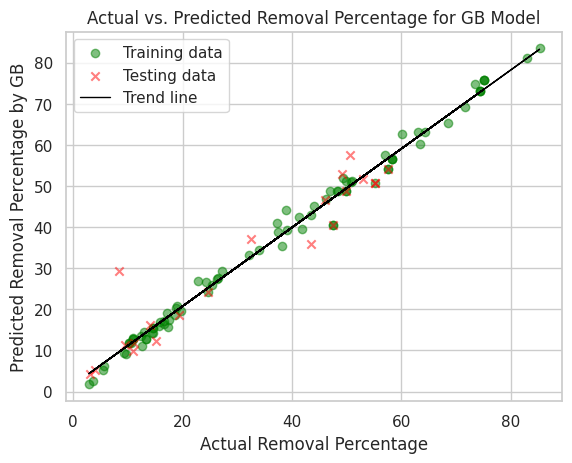

Equation of the trend line: y = 0.9583x + 1.5813


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming 'df' is your DataFrame that contains the dataset
X = df[['Initial concentration', 'Time', 'Temperature', 'pH', 'Dosis']]
y = df['Removal percentage']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Gradient Boosting regression model
modelGB = GradientBoostingRegressor(n_estimators=100, random_state=42)
modelGB.fit(X_train, y_train)

# Predicting on training and test data
y_train_pred_GB = modelGB.predict(X_train)
y_test_pred_GB = modelGB.predict(X_test)

# Calculate performance metrics
mse_train_GB = mean_squared_error(y_train, y_train_pred_GB)
rmse_train_GB = np.sqrt(mse_train_GB)
mae_train_GB = mean_absolute_error(y_train, y_train_pred_GB)
mse_test_GB = mean_squared_error(y_test, y_test_pred_GB)
rmse_test_GB = np.sqrt(mse_test_GB)
mae_test_GB = mean_absolute_error(y_test, y_test_pred_GB)

# Calculate additional metrics
sse_train_GB = np.sum((y_train - y_train_pred_GB) ** 2)
sse_test_GB = np.sum((y_test - y_test_pred_GB) ** 2)
mape_train_GB = np.mean(np.abs((y_train - y_train_pred_GB) / y_train)) * 100
mape_test_GB = np.mean(np.abs((y_test - y_test_pred_GB) / y_test)) * 100
mpe_train_GB = np.mean((y_train - y_train_pred_GB) / y_train) * 100
mpe_test_GB = np.mean((y_test - y_test_pred_GB) / y_test) * 100
cod_train_GB = 1 - (sse_train_GB / np.sum((y_train - np.mean(y_train)) ** 2))
cod_test_GB = 1 - (sse_test_GB / np.sum((y_test - np.mean(y_test)) ** 2))

# Create DataFrames to hold the performance metrics for training and testing data
indicators_df_train_GB = pd.DataFrame({
    'MSE': [mse_train_GB], 'SSE': [sse_train_GB], 'MAPE': [mape_train_GB],
    'RMSE': [rmse_train_GB], 'MAE': [mae_train_GB], 'MPE': [mpe_train_GB], 'COD': [cod_train_GB]
}, index=['Training data'])

indicators_df_test_GB = pd.DataFrame({
    'MSE': [mse_test_GB], 'SSE': [sse_test_GB], 'MAPE': [mape_test_GB],
    'RMSE': [rmse_test_GB], 'MAE': [mae_test_GB], 'MPE': [mpe_test_GB], 'COD': [cod_test_GB]
}, index=['Testing data'])

GBIndicators = pd.concat([indicators_df_train_GB, indicators_df_test_GB])
print(GBIndicators)


# Combine training and testing data for plotting
combined_y_actual = np.concatenate((y_train, y_test))
combined_y_pred_GB = np.concatenate((y_train_pred_GB, y_test_pred_GB))

# Scatter plot for actual vs predicted values
plt.scatter(y_train, y_train_pred_GB, color='green', label='Training data', alpha=0.5)
plt.scatter(y_test, y_test_pred_GB, color='red', marker='x', label='Testing data', alpha=0.5)

# Fitting a trend line
combined_y_actual_reshaped = combined_y_actual.reshape(-1, 1)
linear_reg_model = LinearRegression().fit(combined_y_actual_reshaped, combined_y_pred_GB)
y_trend_line = linear_reg_model.predict(combined_y_actual_reshaped)

# Plot the trend line
plt.plot(combined_y_actual, y_trend_line, color='black', linestyle='-', linewidth=1, label='Trend line')

# Plot customization
plt.xlabel('Actual Removal Percentage')
plt.ylabel('Predicted Removal Percentage by GB')
plt.title('Actual vs. Predicted Removal Percentage for GB Model')
plt.legend()
plt.grid(True)
plt.show()

# Trend line equation
slope = linear_reg_model.coef_[0]
intercept = linear_reg_model.intercept_
print(f"Equation of the trend line: y = {slope:.4f}x + {intercept:.4f}")

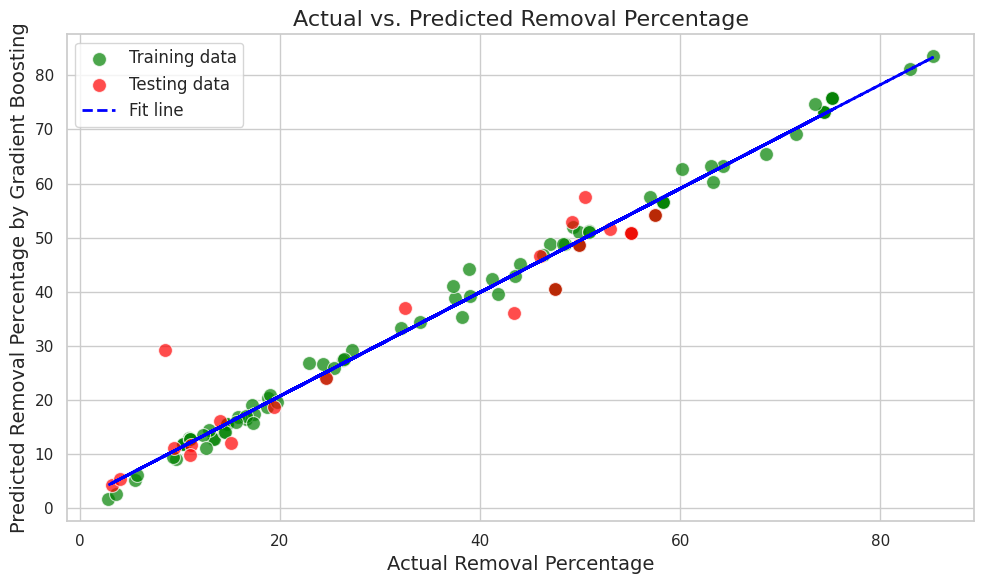

In [ ]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Styling parameters
sns.set(style="whitegrid", palette="muted")

# Create the plot with Seaborn for a more attractive and professional look
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_train_pred_GB, color='green', label='Training data', alpha=0.7, edgecolor='w', s=100)
sns.scatterplot(x=y_test, y=y_test_pred_GB, color='red', label='Testing data', alpha=0.7, edgecolor='w', s=100)

# Linear regression for fit line
y_actual_combined = np.concatenate((y_train, y_test))
y_pred_combined = np.concatenate((y_train_pred_GB, y_test_pred_GB))
regression_model_combined = LinearRegression().fit(y_actual_combined.reshape(-1, 1), y_pred_combined)

# Generate the fit line
y_fit_combined = regression_model_combined.predict(y_actual_combined.reshape(-1, 1))

# Plotting the fit line
plt.plot(y_actual_combined, y_fit_combined, color='blue', linestyle='--', linewidth=2, label='Fit line')

# Add plot details
plt.xlabel('Actual Removal Percentage', fontsize=14)
plt.ylabel('Predicted Removal Percentage by Gradient Boosting', fontsize=14)
plt.title('Actual vs. Predicted Removal Percentage', fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()

# Save the plot as a file
# plt.savefig('scatter_plot_with_regression_line.png', format='png', dpi=300)

# Show the plot
plt.show()


In [ ]:
GBIndicators

,MSE,SSE,MAPE,RMSE,MAE,MPE,COD
Training data,4.052313,340.394271,5.947051,2.013036,1.488670,-0.924476,0.992258
Testing data,33.168504,696.538578,23.088192,5.759210,3.704346,-14.274932,0.913530


In [ ]:
!pip install scikit-optimize



from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args

# Define the space of hyperparameters to search
space  = [Real(10, 1000, name='Initial concentration'),
          Integer(15, 2880, name='Time'),
          Real(300.15, 330.15, name='Temperature'),
          Real(4, 10, name='pH'),
          Real(1, 10, name='Dosis')]

# Define the objective function we want to minimize (in our case, we want to maximize removal,
# hence we minimize the negative of the predicted removal percentage)
@use_named_args(space)
def objective(**params):
    X_new = pd.DataFrame([params])  # Convert params to DataFrame to predict
    removal_percentage_pred = modelGB.predict(X_new)
    # As we want to maximize the removal percentage, we return the negative of the prediction
    return -removal_percentage_pred[0]

# Perform optimization
res_gp = gp_minimize(objective, space, n_calls=50, random_state=42)

# Print the results
print("Best parameters: {}".format(res_gp.x))
print("Best removal percentage: {}".format(-res_gp.fun))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.6 MB/s eta 0:00:00
Best parameters: [10.0, 2880, 313.83943588077784, 4.0, 10.0]
Best removal percentage: 90.47334696634506


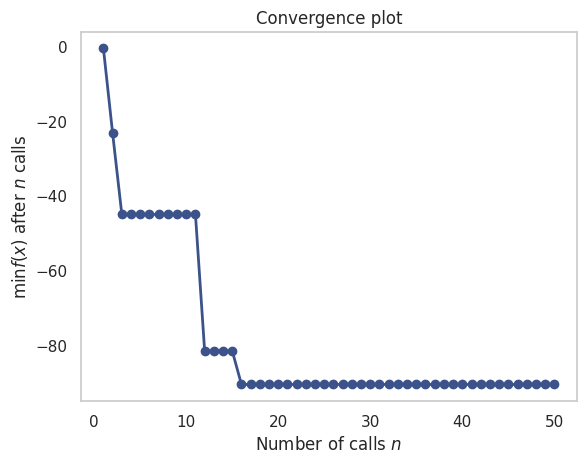

In [ ]:
from skopt.plots import plot_convergence

plot_convergence(res_gp)
plt.show()


In [ ]:
from skopt.plots import plot_objective

plot_objective(result=res_gp, dimensions=['Initial concentration', 'Time', 'Temperature', 'pH', 'Dosis'])
plt.show()


KeyboardInterrupt: 